In [3]:
import numpy as np                 #To work with arrays
import pandas as pd
from datetime import datetime 
import scipy.stats as scs    
from scipy.stats import norm       #For our equation
import yfinance as yf              #For real time stock price data
import seaborn as sns              #For visualisation
import matplotlib.pyplot as plt    #For plotting
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import random

# Data Preprocessing

Data Fetching and Visualisation

In [4]:
# Define the list of tickers
tickers=['AAPL','AMZN','META','TSLA','QCOM']
#This is the list of assets used for the portfolio

In [5]:
start='2023-04-30'
end=datetime.today().strftime('%Y-%m-%d')
end
# time frame defined from start date to now

'2023-11-05'

In [6]:
#Create an empty dataframe to store the adjusted close prices
adj_close_df=pd.DataFrame()

# Download the Adjusted close prices for each ticker

In [7]:
for ticker in tickers:
    data=yf.download(ticker,start=start,end=end)
    adj_close_df[ticker]=data['Adj Close'] # Download Adjusted Close Prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Adj close :They are actually more accurate for calculating optimal portfolio becuase they include dividends and stock splits

In [8]:
aapl_df=yf.download('AAPL',start=start,end=end)
amzn_df=yf.download('AMZN',start=start,end=end)
tsla_df=yf.download('TSLA',start=start,end=end)
qcom_df=yf.download('QCOM',start=start,end=end)
meta_df=yf.download('META',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Display the Dataframe, to understand the distribution

In [10]:
print(adj_close_df)

                  AAPL        AMZN        META        TSLA        QCOM
Date                                                                  
2023-05-01  169.127365  102.050003  243.179993  161.830002  114.232231
2023-05-02  168.080231  103.629997  239.240005  160.309998  114.498497
2023-05-03  166.993195  103.650002  237.029999  160.610001  111.264015
2023-05-04  165.337723  104.000000  233.520004  161.199997  105.100761
2023-05-05  173.096512  105.660004  232.779999  170.059998  107.270226
...                ...         ...         ...         ...         ...
2023-10-30  170.289993  132.710007  302.660004  197.360001  107.830002
2023-10-31  170.770004  133.089996  301.269989  200.839996  108.989998
2023-11-01  173.970001  137.000000  311.850006  205.660004  110.889999
2023-11-02  177.570007  138.070007  310.869995  218.509995  117.360001
2023-11-03  176.649994  138.600006  314.600006  219.960007  119.519997

[131 rows x 5 columns]


In [11]:
stock_price1=aapl_df['Adj Close']
stock_price2=amzn_df['Adj Close']
stock_price3=meta_df['Adj Close']
stock_price4=tsla_df['Adj Close']
stock_price5=qcom_df['Adj Close']

Stock price data of the adj close is saved into 5 variables

# Data Visualization

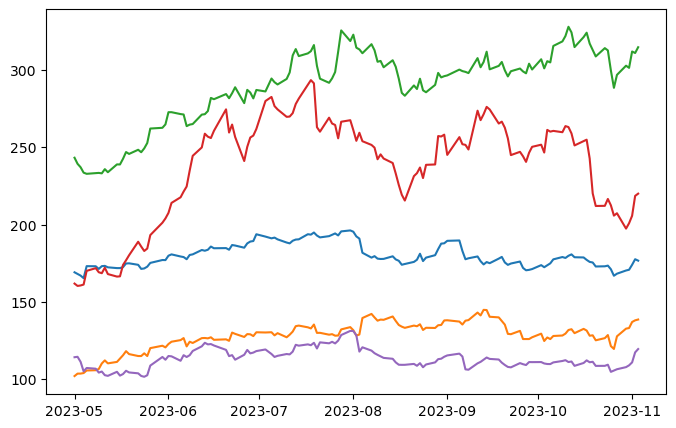

In [12]:
plt.figure(figsize=(8,5))
plt.plot(adj_close_df)

Above is the representation, of stock price data of various assets in the time frame.

In [13]:
correlation=adj_close_df.corr()
adj_close_df.corr()

,AAPL,AMZN,META,TSLA,QCOM
AAPL,1.000000,0.393409,0.382268,0.701099,0.813821
AMZN,0.393409,1.000000,0.817646,0.748630,0.374524
META,0.382268,0.817646,1.000000,0.761631,0.435290
TSLA,0.701099,0.748630,0.761631,1.000000,0.633976
QCOM,0.813821,0.374524,0.435290,0.633976,1.000000


The correlation matrix measures the statistical relationship between two or more variables.

<Axes: >

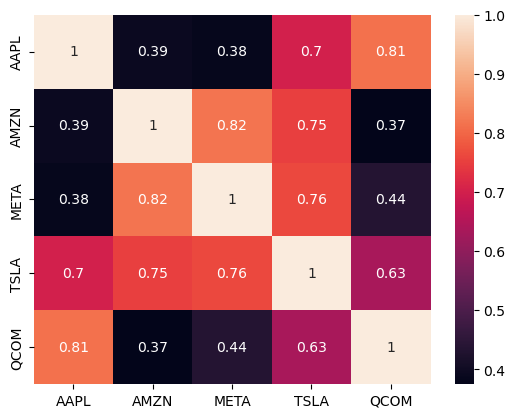

In [14]:
sns.heatmap(correlation,annot=True)

Here, whitish-peach color cells correspond to positive correlation while violet-blue color cells correspond to negative correlation. Orange-pink cells depict moderate relationship.

But what do we infer from heatmaps?

A correlation of +1 means positive relation, i.e, if the correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases. 
A correlation of 0 means no relation.

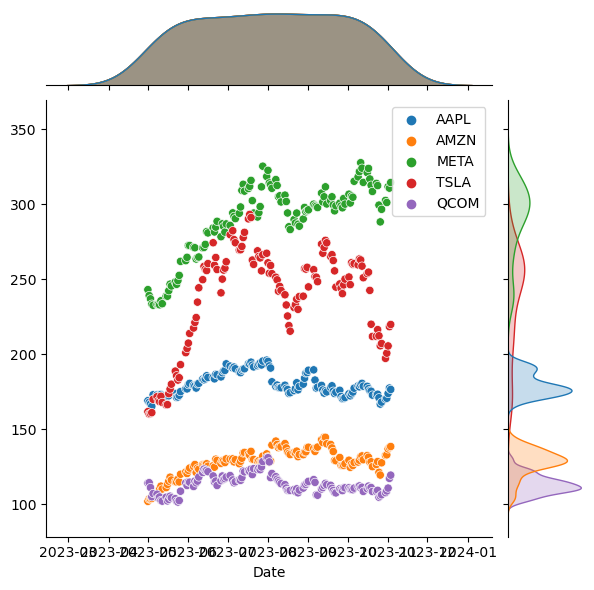

In [15]:
sns.jointplot(adj_close_df)

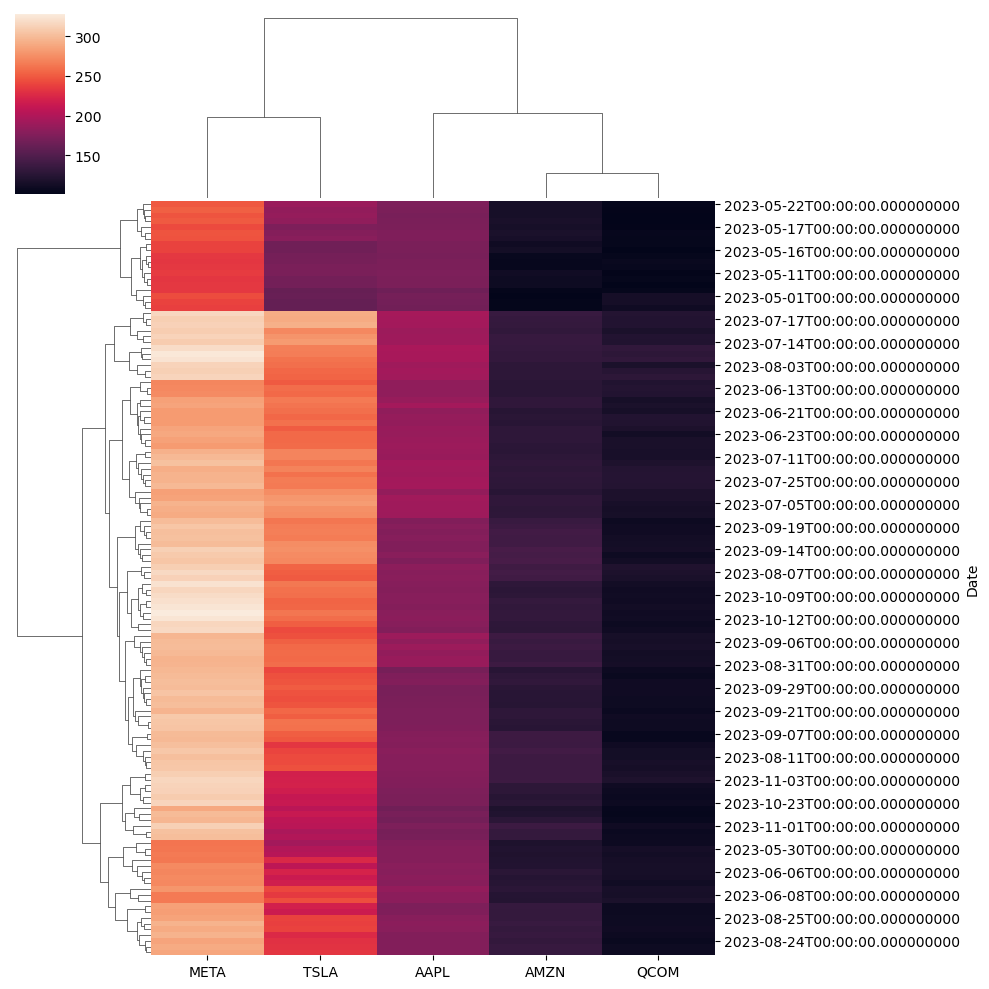

In [16]:
sns.clustermap(adj_close_df)

# Calculate LogNormal Returns

We usually prefer log returns over simple returns due to the following reasons.
1).Its time additive.
2).It follows a normal gaussian distribution.

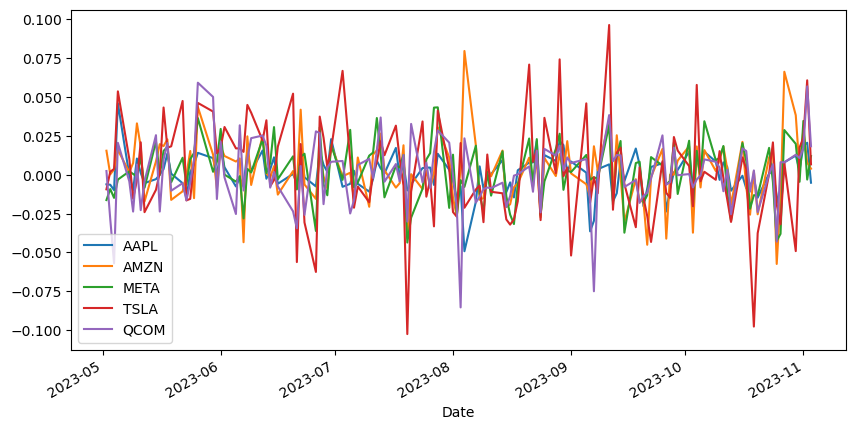

In [17]:
log_returns=np.log(adj_close_df/adj_close_df.shift(1)).dropna()
log_returns_aapl=np.log(aapl_df/adj_close_df.shift(1)).dropna()
#Just to ensure that our calculations later don't get screwed up by adding some information with missing values
log_returns.plot(figsize=(10,5))
plt.show()

Here we plotted the log normal returns of all the assets for visualisation.

# Volatility

Volatility is a statistical measure of the dispersion of returns for a given security or market index. 
In most cases, the higher the volatility, the riskier the security.

In [18]:
rolling_window_days=21 #variable
volatility=log_returns.rolling(window=rolling_window_days).std()*np.sqrt(252) #252 is the number of trading days
volatility_aapl=log_returns_aapl.rolling(window=rolling_window_days).std()*np.sqrt(252)
volatility.iloc[-1]

AAPL    0.183340
AMZN    0.406017
META    0.357721
TSLA    0.531541
QCOM    0.317205
Name: 2023-11-03 00:00:00, dtype: float64

Rolling window refers to a method of forecasting where we only use a certain amount of data at a time to make our predictions

The second line calculates the rolling standard deviation of log_returns over a window of rolling_window_days 
and then multiplies it by the square root of 252(number of trading days in a year).

The next line calculates the rolling standard deviation of log_returns_aapl (of apple)

The last line accesses the last value in the volatility DataFrame, which represents the most recent annualized volatility.

<Axes: xlabel='Date'>

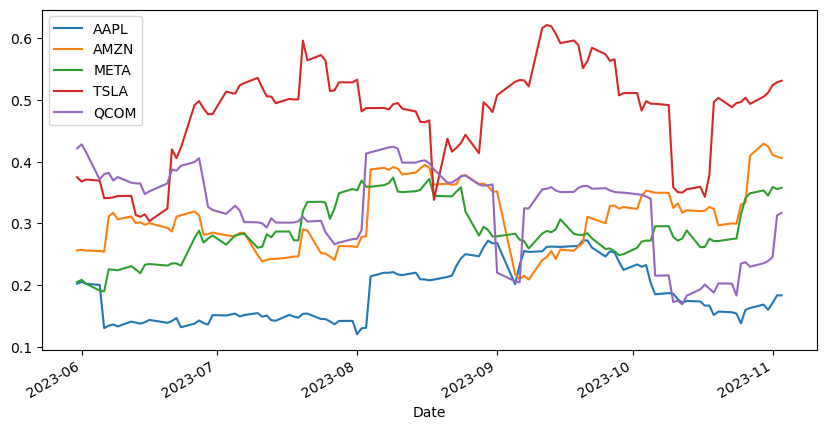

In [19]:
volatility.plot(figsize=(10,5))

Here we plotted the volatility of all the assets within the time frame.

# Calculate Covariance Matrix

Covariance measures the directional relationship between the returns on two assets. A positive covariance means asset returns move together, while a negative covariance means they move inversely

This is how we measure the total risk of the portfolio. each of these five assets has a certain correlation and covariance with each other asset in the portfolio. This is done to calculate risk in the most effective way in the portfolio.

In [20]:
cov_matrix=log_returns.cov()*252
print(cov_matrix)

          AAPL      AMZN      META      TSLA      QCOM
AAPL  0.039291  0.021442  0.028176  0.042530  0.029066
AMZN  0.021442  0.102794  0.055502  0.060753  0.044512
META  0.028176  0.055502  0.085189  0.065898  0.036722
TSLA  0.042530  0.060753  0.065898  0.242254  0.057336
QCOM  0.029066  0.044512  0.036722  0.057336  0.114377


# Define Portfolio Performance Metrics

Calculate the portfolio Standard Deviation

In [21]:
def standard_deviation(weights,cov_matrix):
    variance=weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

Calculate the expected Return
Key assumption: Based on Historical Returns

In [22]:
 def expected_return(weights,log_returns):
        return np.sum(log_returns.mean()*weights)*252

Calculate The Sharpe Ratio

Sharpe Ratio is the risk premium obtained for taking risk free asset divided by the standard deviation

In [23]:
def sharpe_ratio(weights,log_returns,cov_matrix,risk_free_rate):
    return(expected_return(weights,log_returns)-risk_free_rate)/standard_deviation(weights,cov_matrix)

Create an equally weighted Portfolio and find total portfolio expected returns

In [24]:
portfolio_value=100000
weights=np.array([1/len(tickers)] *len(tickers))
portfolio_expected_return=expected_return(weights,log_returns) #calculation of expected returns
portfolio_standard_deviation=standard_deviation(weights,cov_matrix) #normalisation , so that weights add up to 1/

Create a function that gives a random Z-score based on normal distribution

In [25]:
def random_z_score():
    return np.random.normal(0,1)

Create a function to calculate ScenarioGainloss

In [26]:
days=20
def scenario_gain_loss(portfolio_value,portfolio_standard_deviation,z_score,days):
        return portfolio_value*portfolio_expected_return*days+portfolio_value*portfolio_standard_deviation*z_score*np.sqrt(days)

# Run 10,000 Simulations

In [27]:
simulations=10000 #number of times the simulation is being runned
scenarioReturn=[]
for i in range(simulations):
    z_score=random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value,portfolio_standard_deviation,z_score,days))

# Specify a confidence interval and calculate the Value at Risk(VaR)

Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame

A confidence interval is the mean of your estimate plus and minus the variation in that estimate. This is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

In [28]:
confidence_interval=0.95 #variable
VaR=-np.percentile(scenarioReturn,100*(1-confidence_interval))
print(VaR)

-560571.7394003625


# Plot the results of all 10,000 Simulations

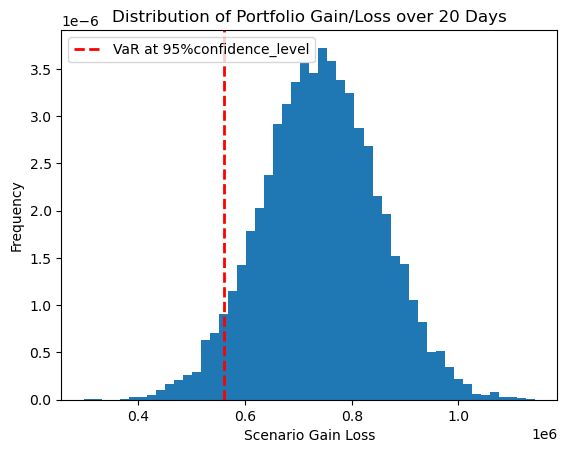

In [29]:
plt.hist(scenarioReturn,bins=50,density=True)
plt.xlabel('Scenario Gain Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Gain/Loss over 20 Days')
plt.axvline(-VaR,color='r',linestyle='dashed',linewidth=2,label=f'VaR at {confidence_interval:.0%}confidence_level')
plt.legend()
plt.show()

A histogram to demonstrate the portfolio gain/loss within 20days along with the VaR(in red)

# MONTE CARLO SIMULATIONS USING STOCHASTIC DIFFERENTIAL EQUATIONS

In [30]:
#generate mc simulations

#how many steps(days):step-size= 1 day
n_t=len(aapl_df)
print("Number of Days:", n_t)

#how many paths/realizations?
n_mc=10000

#Initialize the array S(t)----->the container to be used for mc simulations
St=pd.DataFrame(0., index=aapl_df.index , columns=list (range(1,n_mc+1)))
St.iloc[0]=aapl_df['Adj Close'].iloc[0] 

#annualized volatility
sigma=0.25 #done for simplicity

#drift(business cycle,long-term growth assumptions)
mu=0.08

#step size(what's 1 day in unit of year)
dt=2./(n_t-1)
print("Daily Vol:" ,sigma*np.sqrt(dt))



Number of Days: 131
Daily Vol: 0.031008683647302113


In [31]:
#mc simulation with numpy's random number generator

for i in range(1, n_t):
    dS_2_S=mu*dt +sigma*np.sqrt(dt) *np.random.randn(n_mc) #randn is the normal distribution number generator
    St.iloc[i]=St.iloc[i-1] +St.iloc[i-1] *dS_2_S

Select Random Paths and Visualize

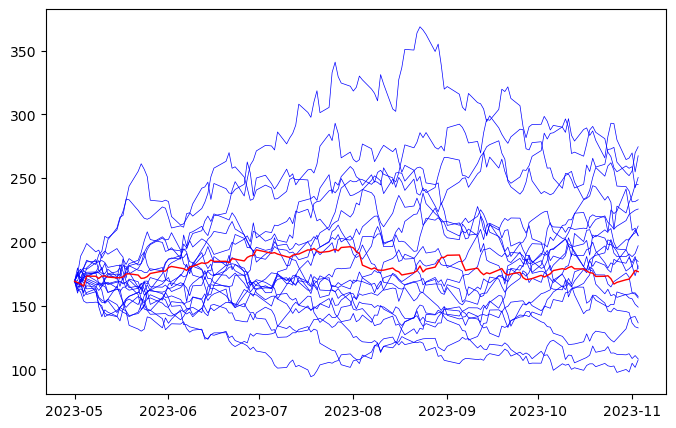

In [32]:
#Visualize to see if we did everything sensible
fig=plt.figure(figsize=(8,5))
axl=fig.add_subplot(111)

for i in np.random.choice(np.array(range(1,n_mc+1)), size=20):
    axl.plot(St[i],'b',lw=0.5)
axl.plot(aapl_df['Adj Close'], 'r', lw=1)    
plt.show()

Here,the blue ones are the randomly simulated monte carlo realizations whereas the red ones are the actual mc realizations. 

#comparing monte carlo with theoretical expectations(from SDE)

In [33]:
#mean from MC
St_mc_mean=St.mean(axis=1)
#mean from theory
St_th_mean=aapl_df['Adj Close'].iloc[0]*np.exp(mu*np.arange(n_t)/n_t *2.)
#St_th_mean=pd.DataFrame([St_th_mean,St_mc_mean.index])   #turn it into a dataframe for easy visualization later

#print out last means for sanity check
print("Expected value from M:",St_mc_mean)
print("Theoretical expected values:", St_th_mean)

Expected value from M: Date
2023-05-01    169.127365
2023-05-02    169.255959
2023-05-03    169.549125
2023-05-04    169.758867
2023-05-05    169.986034
                 ...    
2023-10-30    198.206747
2023-10-31    198.376267
2023-11-01    198.428512
2023-11-02    198.672839
2023-11-03    199.040979
Length: 131, dtype: float64
Theoretical expected values: [169.12736511 169.33405909 169.54100566 169.74820516 169.95565787
 170.16336412 170.37132421 170.57953845 170.78800715 170.99673063
 171.2057092  171.41494316 171.62443282 171.83417852 172.04418054
 172.25443921 172.46495485 172.67572776 172.88675826 173.09804666
 173.30959329 173.52139845 173.73346246 173.94578563 174.1583683
 174.37121076 174.58431335 174.79767637 175.01130014 175.22518499
 175.43933123 175.65373919 175.86840918 176.08334152 176.29853653
 176.51399454 176.72971586 176.94570082 177.16194974 177.37846294
 177.59524075 177.81228349 178.02959148 178.24716504 178.46500451
 178.6831102  178.90148244 179.12012156 179.339

In [34]:
St_mc_median=St.median(axis=1)
St_th_median=aapl_df['Adj Close'].iloc[0]*np.exp((mu-0.5*sigma*sigma)*np.arange(n_t)/n_t*2.)
print("Value from MC:",St_mc_median.iloc[-1])
print("Expected Theoretical Value:" ,St_th_median[-1])

Value from MC: 188.06905256680153
Expected Theoretical Value: 186.30922550267127


As we can see the theoritical method also does a good work in calculating, as both values are close to each other

In [35]:
num_sims=10000
rfr=0
time=30
vol=0.25
S0=aapl_df.Close[0]
S1=amzn_df.Close[0]
S2=meta_df.Close[0]
S3=tsla_df.Close[0]
S4=qcom_df.Close[0]

In [36]:
d=(rfr-0.5*vol**2)*(time/252)
a=vol*np.sqrt(time/252)
r=np.random.normal(0,1,(num_sims,1))

GBM_returns0=S0*np.exp(d+a*r)
GBM_returns1=S1*np.exp(d+a*r)
GBM_returns2=S2*np.exp(d+a*r)
GBM_returns3=S3*np.exp(d+a*r)
GBM_returns4=S4*np.exp(d+a*r)

In [39]:
pers=[0.01,0.1,1.0,2.5,5.0,10.0]
var=scs.scoreatpercentile(GBM_returns0-1,pers)
df=pd.DataFrame(var,pers,columns=['VaR'])
df

,VaR
0.01,121.515787
0.10,128.880474
1.00,137.538706
2.50,141.555919
5.00,145.733843
10.00,150.496456
